# Prediction Diabete Dataset Using Machine Learning

# Business Problem
  It is desired to develope a machine learning model that can predict whether people have diabetes when their characteristics specified.

# Dataset Story

This dataset is originally from the National Institute of Diabetes and Digestive and KidneyDiseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,based on certain diagnostic measurements included in the dataset. Several constraints were placedon the selection of these instances from a larger database. In particular, all patients here are femalesat least 21 years old of Pima Indian heritage

Pregnancies: To express the Number of pregnancies

Glucose: To express the Glucose level in blood

BloodPressure: To express the Blood pressure measurement

SkinThickness: To express the thickness of the skin

Insulin: To express the Insulin level in blood

BMI: To express the Body mass index

DiabetesPedigreeFunction: To express the Diabetes percentage

Age: To express the age

Outcome: To express the final result 1 is Yes and 0 is No

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.4f" % x)

import warnings
warnings.filterwarnings("ignore")

#Import Dataset

In [2]:
diabetes = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/diabetes.csv")
df = diabetes.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1


In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

######################### Head #########################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.6000                    0.6270   50        1
1            1       85             66             29        0 26.6000                    0.3510   31        0
2            8      183             64              0        0 23.3000                    0.6720   32        1
3            1       89             66             23       94 28.1000                    0.1670   21        0
4            0      137             40             35      168 43.1000                    2.2880   33        1
######################### Tail #########################
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.9000                    0.1710   63    

# Analysis of Categorical and Numerical Variables

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [6]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"Num_but_cat: {len(num_but_cat)}")

Observations: 768
Variables: 9
Cat_cols: 1
Num_cols: 8
Cat_but_car: 0
Num_but_cat: 1


In [7]:
def num_summary(dataframe, num_col, plot=False):
  print(50*"#", num_col ,50*"#")
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.ylabel(num_col)
    plt.show(block=True)

In [8]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

################################################## Pregnancies ##################################################
count   768.0000
mean      3.8451
std       3.3696
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       1.0000
30%       1.0000
40%       2.0000
50%       3.0000
60%       4.0000
70%       5.0000
80%       7.0000
90%       9.0000
95%      10.0000
99%      13.0000
max      17.0000
Name: Pregnancies, dtype: float64


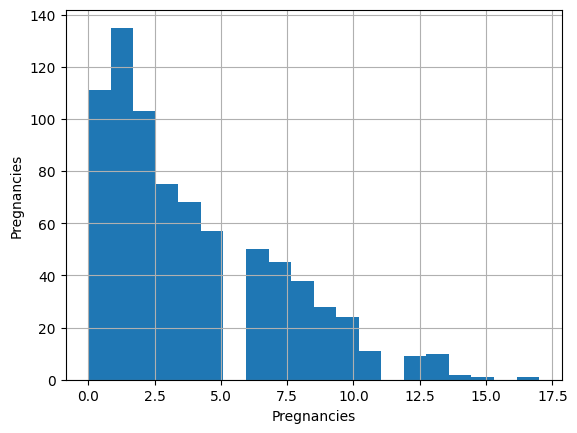

################################################## Glucose ##################################################
count   768.0000
mean    120.8945
std      31.9726
min       0.0000
1%       57.0000
5%       79.0000
10%      85.0000
20%      95.0000
30%     102.0000
40%     109.0000
50%     117.0000
60%     125.0000
70%     134.0000
80%     147.0000
90%     167.0000
95%     181.0000
99%     196.0000
max     199.0000
Name: Glucose, dtype: float64


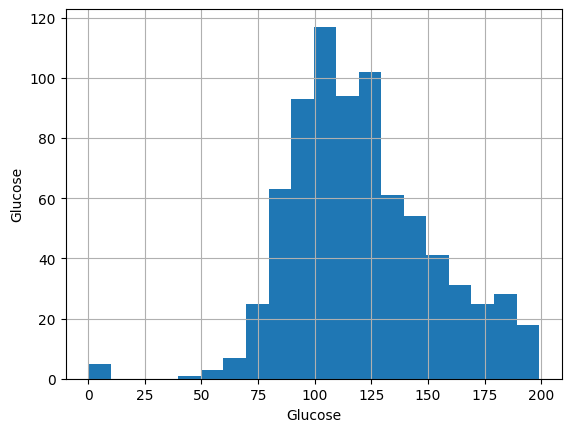

################################################## BloodPressure ##################################################
count   768.0000
mean     69.1055
std      19.3558
min       0.0000
1%        0.0000
5%       38.7000
10%      54.0000
20%      60.0000
30%      64.0000
40%      68.0000
50%      72.0000
60%      74.0000
70%      78.0000
80%      82.0000
90%      88.0000
95%      90.0000
99%     106.0000
max     122.0000
Name: BloodPressure, dtype: float64


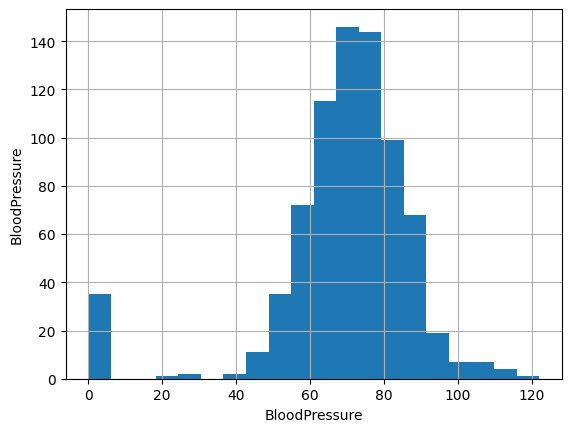

################################################## SkinThickness ##################################################
count   768.0000
mean     20.5365
std      15.9522
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       8.2000
40%      18.0000
50%      23.0000
60%      27.0000
70%      31.0000
80%      35.0000
90%      40.0000
95%      44.0000
99%      51.3300
max      99.0000
Name: SkinThickness, dtype: float64


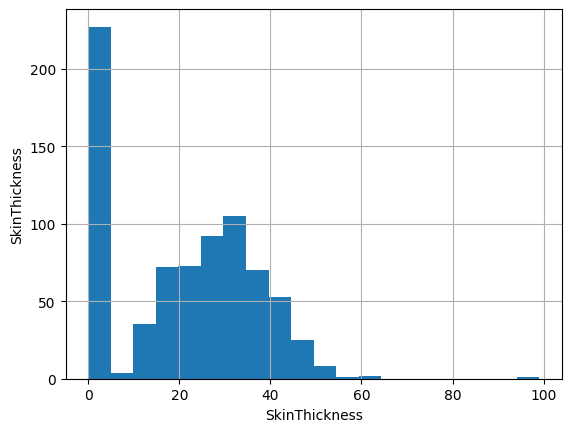

################################################## Insulin ##################################################
count   768.0000
mean     79.7995
std     115.2440
min       0.0000
1%        0.0000
5%        0.0000
10%       0.0000
20%       0.0000
30%       0.0000
40%       0.0000
50%      30.5000
60%      72.2000
70%     106.0000
80%     150.0000
90%     210.0000
95%     293.0000
99%     519.9000
max     846.0000
Name: Insulin, dtype: float64


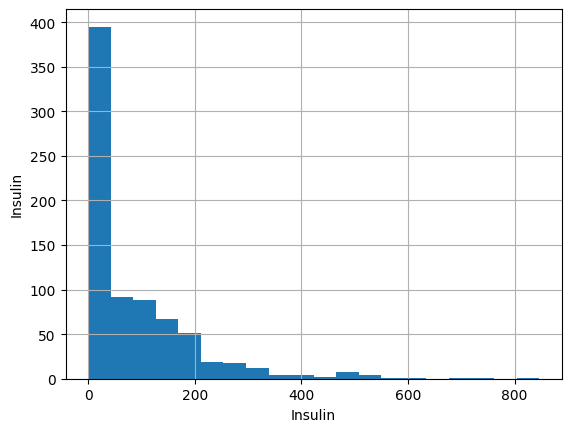

################################################## BMI ##################################################
count   768.0000
mean     31.9926
std       7.8842
min       0.0000
1%        0.0000
5%       21.8000
10%      23.6000
20%      25.9000
30%      28.2000
40%      30.1000
50%      32.0000
60%      33.7000
70%      35.4900
80%      37.8000
90%      41.5000
95%      44.3950
99%      50.7590
max      67.1000
Name: BMI, dtype: float64


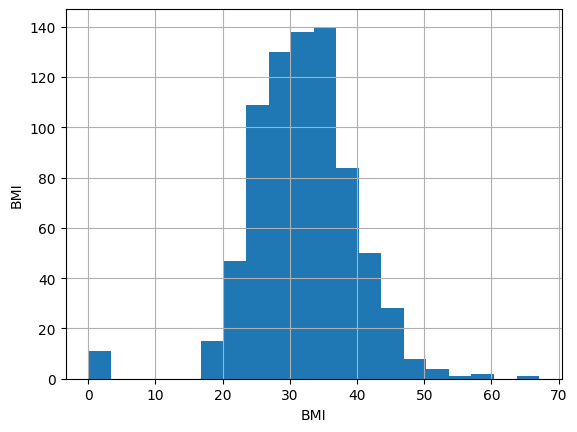

################################################## DiabetesPedigreeFunction ##################################################
count   768.0000
mean      0.4719
std       0.3313
min       0.0780
1%        0.0947
5%        0.1404
10%       0.1650
20%       0.2194
30%       0.2590
40%       0.3028
50%       0.3725
60%       0.4542
70%       0.5637
80%       0.6870
90%       0.8786
95%       1.1328
99%       1.6983
max       2.4200
Name: DiabetesPedigreeFunction, dtype: float64


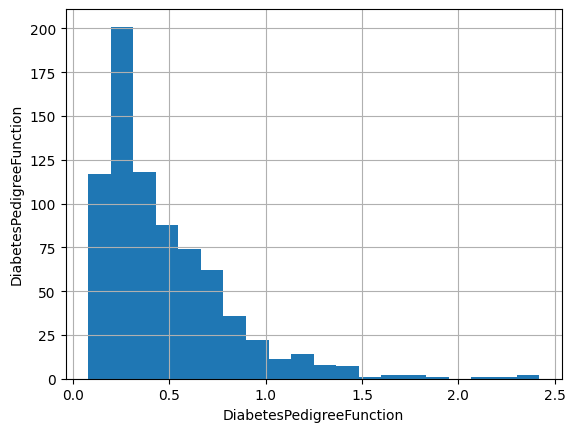

################################################## Age ##################################################
count   768.0000
mean     33.2409
std      11.7602
min      21.0000
1%       21.0000
5%       21.0000
10%      22.0000
20%      23.0000
30%      25.0000
40%      27.0000
50%      29.0000
60%      33.0000
70%      38.0000
80%      42.6000
90%      51.0000
95%      58.0000
99%      67.0000
max      81.0000
Name: Age, dtype: float64


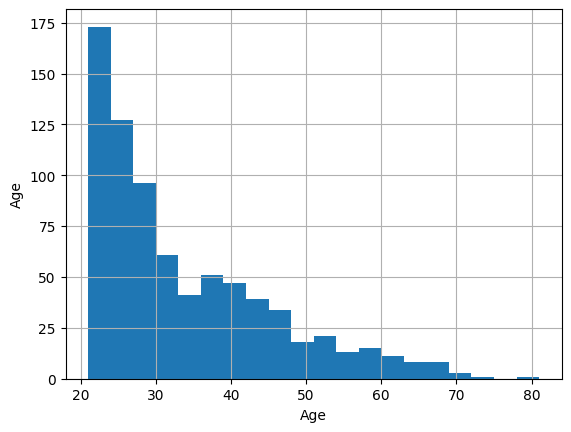

In [9]:
num_summary_df(df)

In [10]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(12,4))
  for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

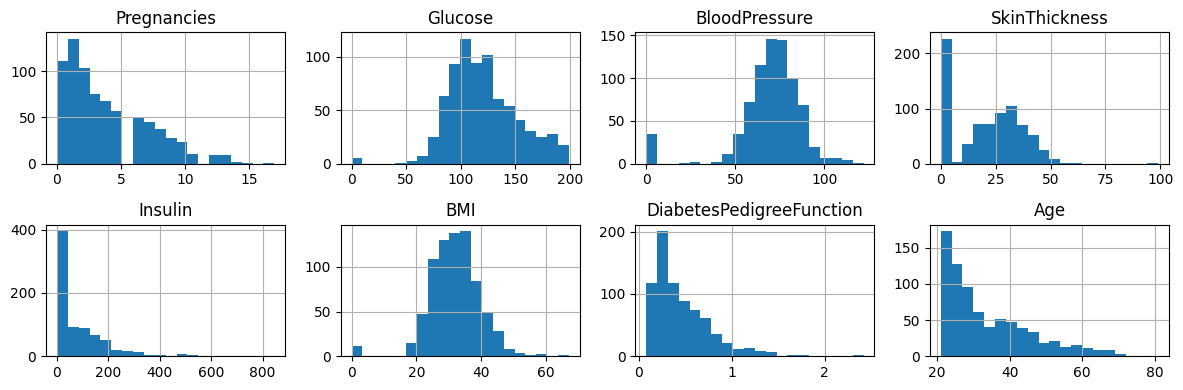

In [11]:
plot_num_summary(df)

In [12]:
def cat_summary(dataframe, col_name, plot=False):
  print(50*"#", f"{col_name}", 50*"#")
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show(block=True)

In [13]:
def  cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in cat_cols:
    if dataframe[col].dtypes == "bool":
      new_df = pd.DataFrame()
      new_df[col] = dataframe[col].astype(int)
      cat_summary(new_df, col, plot=True)
    else:
      cat_summary(dataframe, col, plot=True)

################################################## Outcome ##################################################
   Outcome   Ratio
0      500 65.1042
1      268 34.8958


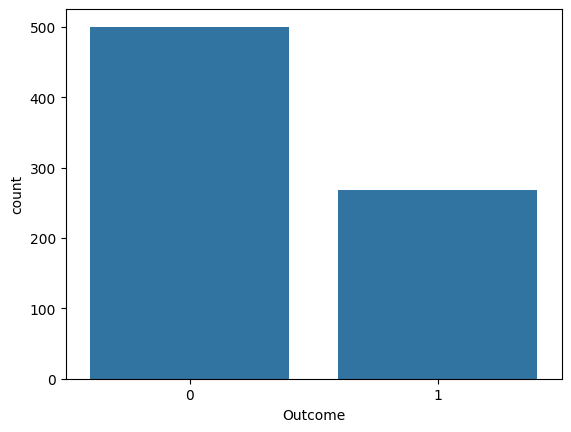

In [14]:
cat_summary_df(df)

In [15]:
def target_summary_num(dataframe, target, numerical_col):
  print("#"*15, f"{target} --> {numerical_col}", "#"*15)
  print(pd.DataFrame({"Target mean": dataframe.groupby(target)[numerical_col].mean()}))

In [16]:
def target_summary_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, cat_but_num = grab_col_names(dataframe)
  for col in num_cols:
    target_summary_num(dataframe, target, col)

In [17]:
target_summary_num_df(df, "Outcome")

############### Outcome --> Pregnancies ###############
         Target mean
Outcome             
0             3.2980
1             4.8657
############### Outcome --> Glucose ###############
         Target mean
Outcome             
0           109.9800
1           141.2575
############### Outcome --> BloodPressure ###############
         Target mean
Outcome             
0            68.1840
1            70.8246
############### Outcome --> SkinThickness ###############
         Target mean
Outcome             
0            19.6640
1            22.1642
############### Outcome --> Insulin ###############
         Target mean
Outcome             
0            68.7920
1           100.3358
############### Outcome --> BMI ###############
         Target mean
Outcome             
0            30.3042
1            35.1425
############### Outcome --> DiabetesPedigreeFunction ###############
         Target mean
Outcome             
0             0.4297
1             0.5505
############### Out

# Correlation Analysis

In [18]:
def correlated_cols(dataframe, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  print(corr)

  if plot:
    sns.set(rc={'figure.figsize': (18,13)})
    sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
    plt.show()

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction     Age  Outcome
Pregnancies                    1.0000   0.1295         0.1413        -0.0817  -0.0735 0.0177                   -0.0335  0.5443   0.2219
Glucose                        0.1295   1.0000         0.1526         0.0573   0.3314 0.2211                    0.1373  0.2635   0.4666
BloodPressure                  0.1413   0.1526         1.0000         0.2074   0.0889 0.2818                    0.0413  0.2395   0.0651
SkinThickness                 -0.0817   0.0573         0.2074         1.0000   0.4368 0.3926                    0.1839 -0.1140   0.0748
Insulin                       -0.0735   0.3314         0.0889         0.4368   1.0000 0.1979                    0.1851 -0.0422   0.1305
BMI                            0.0177   0.2211         0.2818         0.3926   0.1979 1.0000                    0.1406  0.0362   0.2927
DiabetesPedigreeFunction      -0.0335   0.1373  

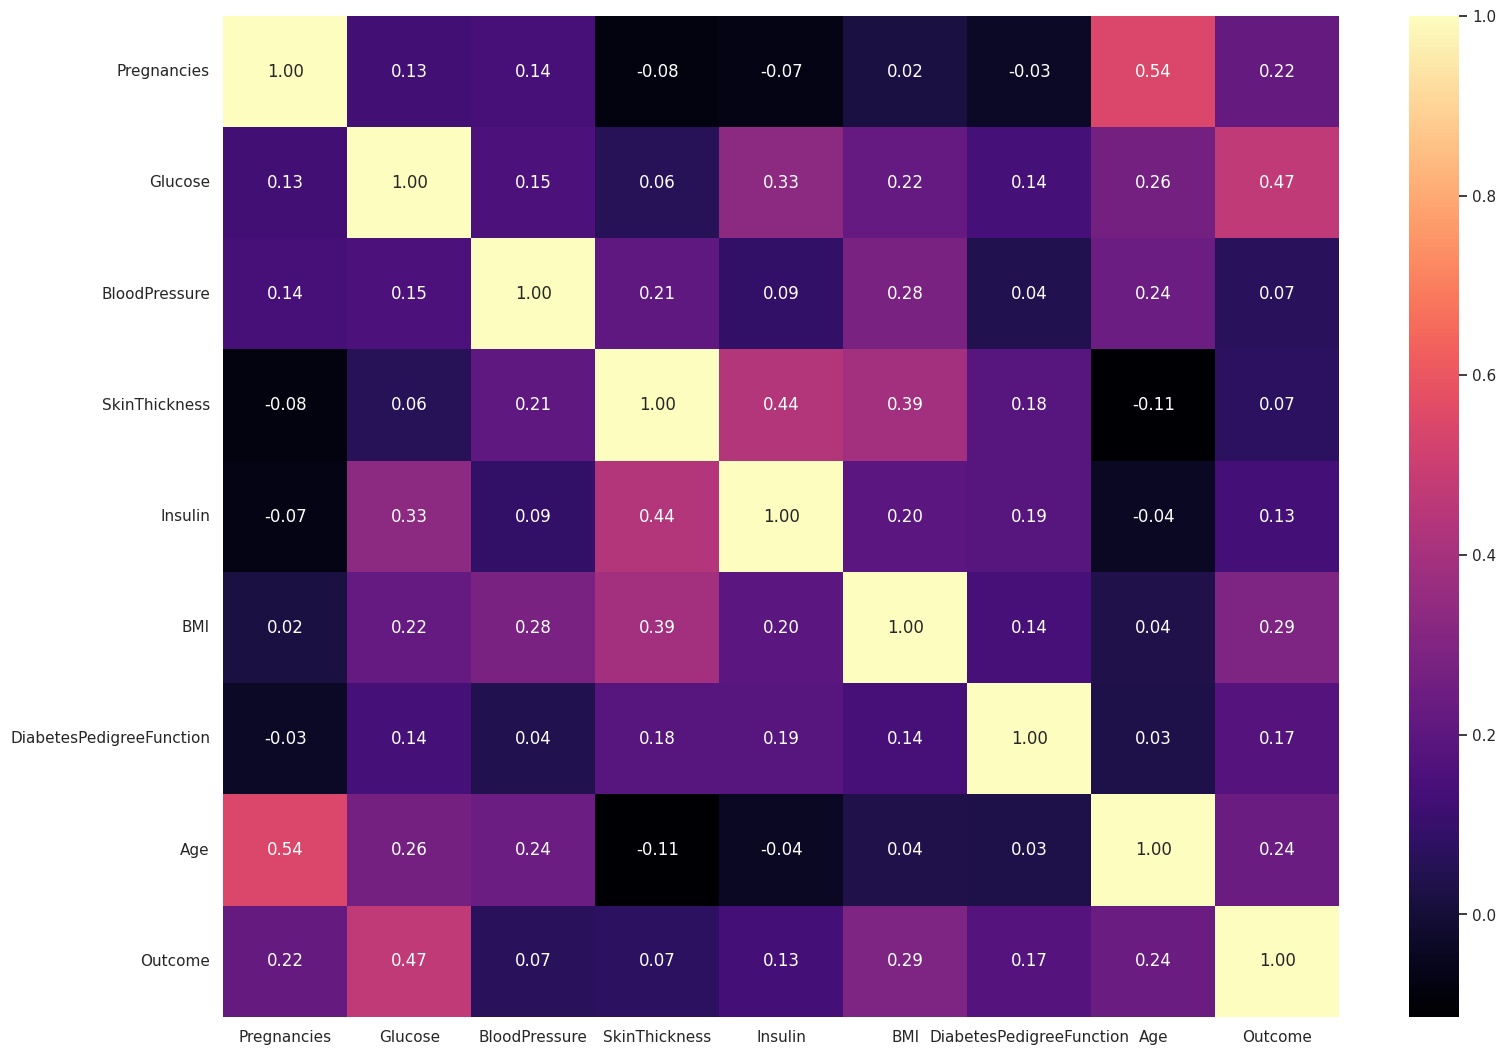

In [19]:
correlated_cols(df, plot=True)

In [20]:
def high_correlated_cols(dataframe, corr_th = 0.90, plot=False):
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64"]]
  corr = dataframe[num_cols].corr()
  corr_matrix = corr.abs()
  upper_triangular_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangular_matrix.columns if any(upper_triangular_matrix[col] > corr_th)]
  if drop_list == []:
    print("Aftre corelation analysis, we dont need to remove variables")

  if plot:
    sns.set(rc={'figure.figsize': (18,13)})
    sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
    plt.show()

  return drop_list

Aftre corelation analysis, we dont need to remove variables


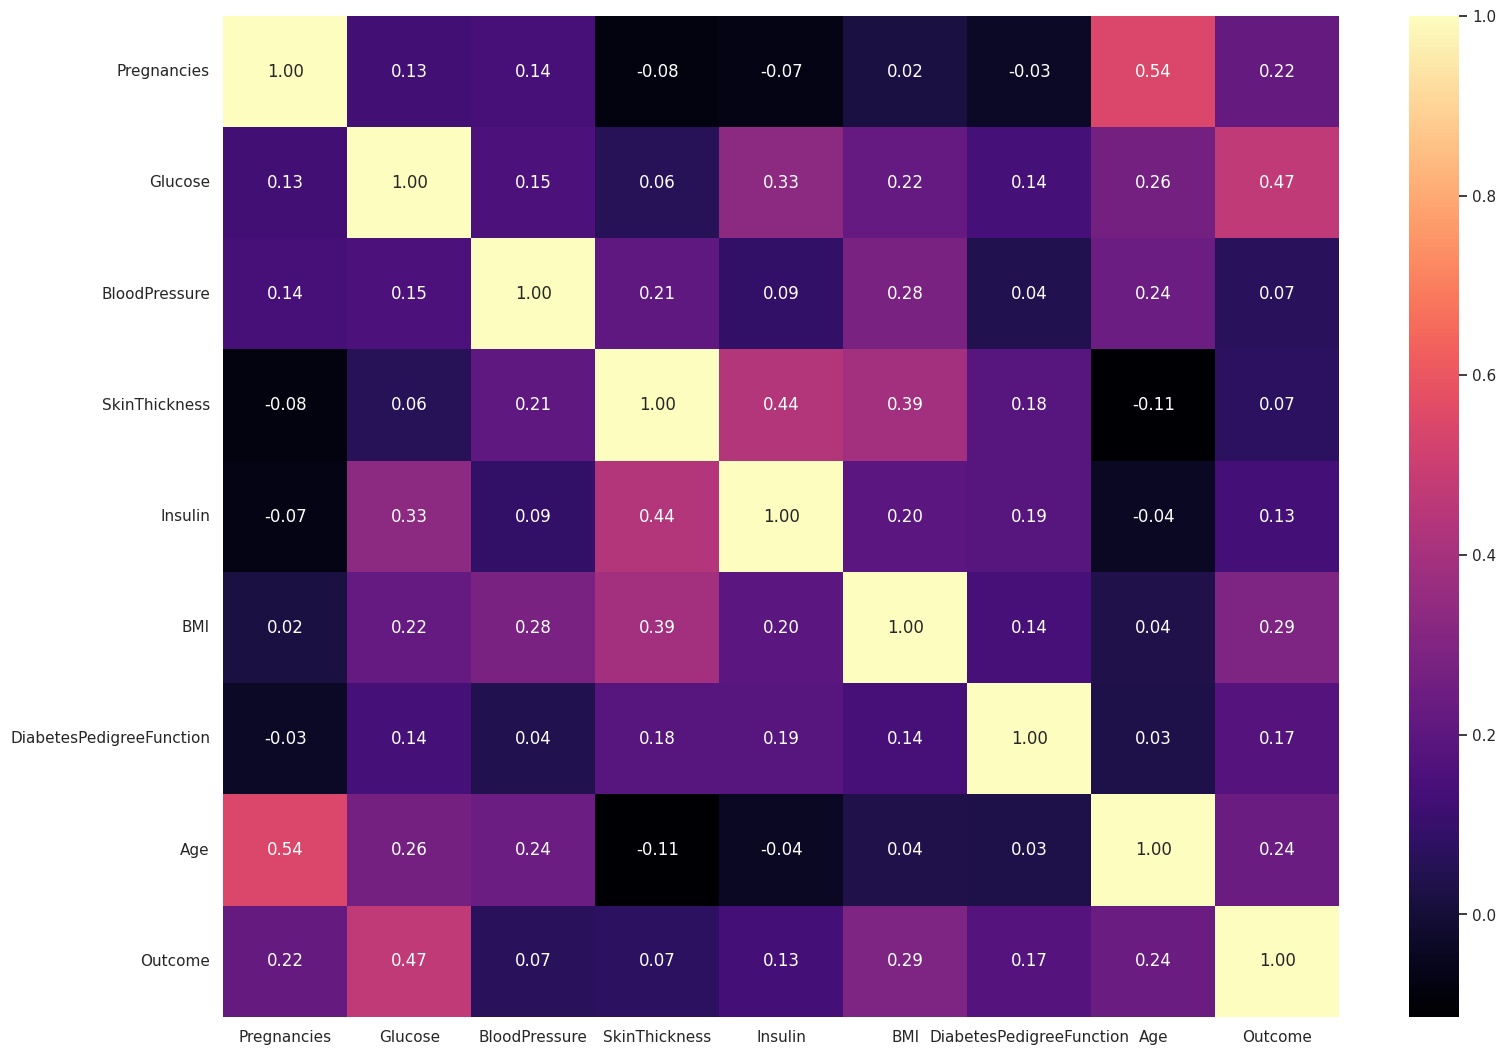

[]

In [21]:
high_correlated_cols(df, plot=True)

# Create a Base Model (Machine Learning Model)

In [55]:
def RF_Model(dataframe, target, test_size=0.3, save= False, csv=False):
  y = dataframe[target]
  X = dataframe.drop(target, axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=17)
  rf_model = RandomForestClassifier(random_state=17).fit(X_train, y_train)
  y_pred = rf_model.predict(X_test)
  print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")

  feature_imp = pd.DataFrame({'Value': rf_model.feature_importances_, 'Feature': X.columns})
  plt.figure(figsize=(8, 8))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending= False))
  plt.title("Features")
  plt.tight_layout()

  if save:
    plt.savefig("feature_importance.jpg")

  if csv:
    output = pd.DataFrame(y_pred)
    output.to_csv("output.csv")

  return y_pred

Accuracy: 0.79


array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

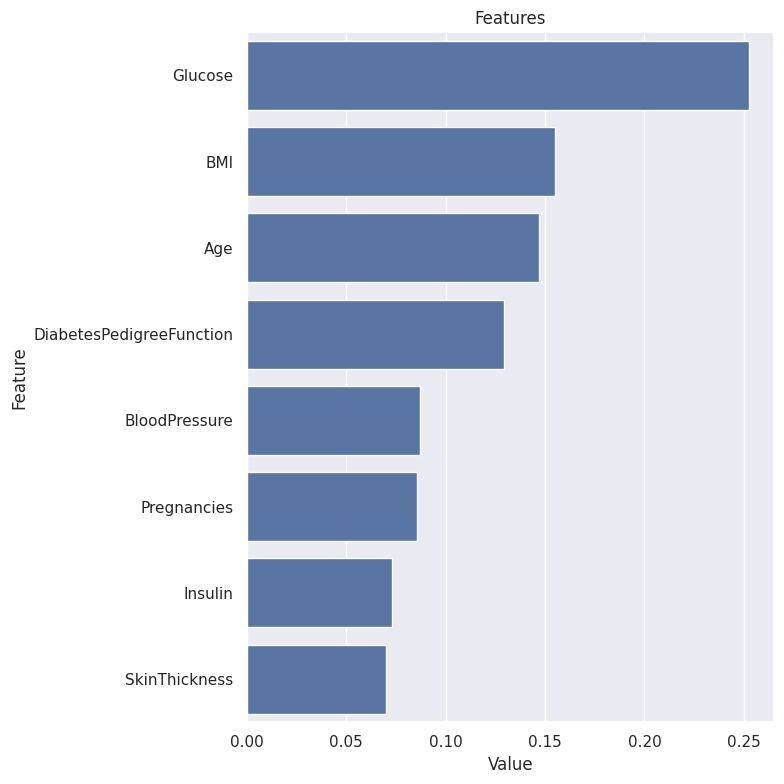

In [56]:
RF_Model(df, "Outcome")